In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from datetime import timedelta

c:\Users\n9810200\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/1085847082.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = 'all.csv'
df = pd.read_csv(file_path)
df

,Event_id,Timestamp,Activity,Object_id,E2O_qualifier,Cargo ID,LPT,Axles,Scheduled Pickup Weight,Truck Status,Truck Weight,Num of trucks,Total pickup weight,Cargo Type,Cargo stock weight(scheduled),Silo ID,Truck ID,pickup,Pickup Plan ID
0,assign_tr1_Pcp47,2024-05-01 10:49:20,Assign Truck,tr1,Truck being assigned for pickup,Cr13,NaN,NaN,5308.7,Occupied,NaN,NaN,NaN,NaN,NaN,NaN,tr1,1.0,Pcp47
1,weigh_empty_truck_Pcp47_tr1,2024-05-01 10:56:05,Weigh the Empty Truck,tr1,Empty truck getting weighed,Cr13,NaN,NaN,NaN,NaN,11221.4,NaN,NaN,NaN,NaN,NaN,tr1,1.0,Pcp47
2,load_truck_Pcp47_tr1,2024-05-01 10:56:44,Load Truck,tr1,Truck being loaded with cargo,Cr13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tr1,1.0,Pcp47
3,weigh_loaded_truck_Pcp47_tr1,2024-05-01 12:01:28,Weigh the Loaded Truck,tr1,Loaded truck getting weighed,Cr13,NaN,NaN,NaN,NaN,16530.1,NaN,NaN,NaN,NaN,NaN,tr1,1.0,Pcp47
4,print_w_ticket_Pcp47_tr1,2024-05-01 12:05:09,Print the Weighing Ticket,tr1,Truck receiving weighing ticket,Cr13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tr1,1.0,Pcp47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,Lodge_Pcp37,2024-04-30 09:33:26,Lodge Pickup Plan,Pcp37,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10831.7,NaN,70689.5,NaN,NaN,NaN,Pcp37
1766,Lodge_Pcp75,2024-04-30 09:48:21,Lodge Pickup Plan,Pcp75,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11362.6,NaN,55629.0,NaN,NaN,NaN,Pcp75
1767,Lodge_Pcp62,2024-04-30 11:13:27,Lodge Pickup Plan,Pcp62,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10123.2,NaN,39322.9,NaN,NaN,NaN,Pcp62
1768,Lodge_Pcp50,2024-04-30 11:14:56,Lodge Pickup Plan,Pcp50,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11828.4,NaN,77221.3,NaN,NaN,NaN,Pcp50


In [3]:
def add_duration_columns(df, group_col='pickup'):
    df = df.copy()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    

    df['Assign_weighempty'] = None
    df['EmptyWeighing_Stack'] = None
    df['Stack_Loaded'] = None
    df['LoadedWeighing_Exit'] = None
    

    for group_id, group in df.groupby(group_col):
        def get_duration(start_act, end_act):
            start = group.loc[group['Activity'] == start_act, 'Timestamp']
            end = group.loc[group['Activity'] == end_act, 'Timestamp']
            if not start.empty and not end.empty:
                return (end.iloc[0] - start.iloc[0]).total_seconds() / 60  # duration in minutes
            return None

        assign_weigh = get_duration("Assign Truck", "Weigh the Empty Truck")
        empty_silo = get_duration("Weigh the Empty Truck","Load Truck")
        stack_loaded = get_duration("Load Truck", "Weigh the Loaded Truck")
        loaded_exit = get_duration("Weigh the Loaded Truck", "Evaluate the Truck Exit")
        
        df.loc[group.index, 'Assign_weighempty'] = assign_weigh
        df.loc[group.index,'EmptyWeighing_Stack'] = empty_silo
        df.loc[group.index, 'Stack_Loaded'] = stack_loaded
        df.loc[group.index, 'LoadedWeighing_Exit'] = loaded_exit

    return df

In [4]:
df_durations = add_duration_columns(df)
df_durations

,Event_id,Timestamp,Activity,Object_id,E2O_qualifier,Cargo ID,LPT,Axles,Scheduled Pickup Weight,Truck Status,...,Cargo Type,Cargo stock weight(scheduled),Silo ID,Truck ID,pickup,Pickup Plan ID,Assign_weighempty,EmptyWeighing_Stack,Stack_Loaded,LoadedWeighing_Exit
0,assign_tr1_Pcp47,2024-05-01 10:49:20,Assign Truck,tr1,Truck being assigned for pickup,Cr13,NaN,NaN,5308.7,Occupied,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
1,weigh_empty_truck_Pcp47_tr1,2024-05-01 10:56:05,Weigh the Empty Truck,tr1,Empty truck getting weighed,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
2,load_truck_Pcp47_tr1,2024-05-01 10:56:44,Load Truck,tr1,Truck being loaded with cargo,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
3,weigh_loaded_truck_Pcp47_tr1,2024-05-01 12:01:28,Weigh the Loaded Truck,tr1,Loaded truck getting weighed,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
4,print_w_ticket_Pcp47_tr1,2024-05-01 12:05:09,Print the Weighing Ticket,tr1,Truck receiving weighing ticket,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,Lodge_Pcp37,2024-04-30 09:33:26,Lodge Pickup Plan,Pcp37,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,70689.5,NaN,NaN,NaN,Pcp37,None,None,None,None
1766,Lodge_Pcp75,2024-04-30 09:48:21,Lodge Pickup Plan,Pcp75,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,55629.0,NaN,NaN,NaN,Pcp75,None,None,None,None
1767,Lodge_Pcp62,2024-04-30 11:13:27,Lodge Pickup Plan,Pcp62,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,39322.9,NaN,NaN,NaN,Pcp62,None,None,None,None
1768,Lodge_Pcp50,2024-04-30 11:14:56,Lodge Pickup Plan,Pcp50,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,77221.3,NaN,NaN,NaN,Pcp50,None,None,None,None


In [5]:
pickup_process = df_durations[(df_durations['pickup'].notnull())]
pickup_process
# 1400 rows
# pickup_process.to_csv('All_pickups.csv',index=False)

,Event_id,Timestamp,Activity,Object_id,E2O_qualifier,Cargo ID,LPT,Axles,Scheduled Pickup Weight,Truck Status,...,Cargo Type,Cargo stock weight(scheduled),Silo ID,Truck ID,pickup,Pickup Plan ID,Assign_weighempty,EmptyWeighing_Stack,Stack_Loaded,LoadedWeighing_Exit
0,assign_tr1_Pcp47,2024-05-01 10:49:20,Assign Truck,tr1,Truck being assigned for pickup,Cr13,NaN,NaN,5308.7,Occupied,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
1,weigh_empty_truck_Pcp47_tr1,2024-05-01 10:56:05,Weigh the Empty Truck,tr1,Empty truck getting weighed,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
2,load_truck_Pcp47_tr1,2024-05-01 10:56:44,Load Truck,tr1,Truck being loaded with cargo,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
3,weigh_loaded_truck_Pcp47_tr1,2024-05-01 12:01:28,Weigh the Loaded Truck,tr1,Loaded truck getting weighed,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
4,print_w_ticket_Pcp47_tr1,2024-05-01 12:05:09,Print the Weighing Ticket,tr1,Truck receiving weighing ticket,Cr13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr1,1.0,Pcp47,6.75,0.65,64.733333,8.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,load_truck_Pcp78_tr9,2024-05-02 08:18:08,Load Truck,tr9,Truck being loaded with cargo,Cr5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr9,200.0,Pcp78,1.45,1.5,18.016667,4.316667
1396,weigh_loaded_truck_Pcp78_tr9,2024-05-02 08:36:09,Weigh the Loaded Truck,tr9,Loaded truck getting weighed,Cr5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr9,200.0,Pcp78,1.45,1.5,18.016667,4.316667
1397,input_tally_sheet_Pcp78_tr9,2024-05-02 08:38:50,Input the Tally Sheet,tr9,Truck being recorded on tally sheet,Cr5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr9,200.0,Pcp78,1.45,1.5,18.016667,4.316667
1398,print_w_ticket_Pcp78_tr9,2024-05-02 08:38:50,Print the Weighing Ticket,tr9,Truck receiving weighing ticket,Cr5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tr9,200.0,Pcp78,1.45,1.5,18.016667,4.316667


In [6]:
non_pickup_process = df_durations[(df_durations['pickup'].isna())]
non_pickup_process
# 370 rows

,Event_id,Timestamp,Activity,Object_id,E2O_qualifier,Cargo ID,LPT,Axles,Scheduled Pickup Weight,Truck Status,...,Cargo Type,Cargo stock weight(scheduled),Silo ID,Truck ID,pickup,Pickup Plan ID,Assign_weighempty,EmptyWeighing_Stack,Stack_Loaded,LoadedWeighing_Exit
1400,NaN,2024-03-04 00:00:00,Review the Truck Information,tr1,NaN,NaN,779BOG,6.0,0.0,Available,...,NaN,NaN,NaN,tr1,NaN,NaN,None,None,None,None
1401,NaN,2024-05-01 12:21:51,Prepare Reassignment,tr1,NaN,NaN,NaN,NaN,NaN,Available,...,NaN,NaN,NaN,tr1,NaN,NaN,None,None,None,None
1402,NaN,2024-05-01 15:14:35,Prepare Reassignment,tr1,NaN,NaN,NaN,NaN,NaN,Available,...,NaN,NaN,NaN,tr1,NaN,NaN,None,None,None,None
1403,NaN,2024-05-01 16:42:00,Prepare Reassignment,tr1,NaN,NaN,NaN,NaN,NaN,Available,...,NaN,NaN,NaN,tr1,NaN,NaN,None,None,None,None
1404,NaN,2024-05-01 19:04:22,Prepare Reassignment,tr1,NaN,NaN,NaN,NaN,NaN,Available,...,NaN,NaN,NaN,tr1,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,Lodge_Pcp37,2024-04-30 09:33:26,Lodge Pickup Plan,Pcp37,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,70689.5,NaN,NaN,NaN,Pcp37,None,None,None,None
1766,Lodge_Pcp75,2024-04-30 09:48:21,Lodge Pickup Plan,Pcp75,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,55629.0,NaN,NaN,NaN,Pcp75,None,None,None,None
1767,Lodge_Pcp62,2024-04-30 11:13:27,Lodge Pickup Plan,Pcp62,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,39322.9,NaN,NaN,NaN,Pcp62,None,None,None,None
1768,Lodge_Pcp50,2024-04-30 11:14:56,Lodge Pickup Plan,Pcp50,Pickup plan being lodged,NaN,NaN,NaN,NaN,NaN,...,NaN,77221.3,NaN,NaN,NaN,Pcp50,None,None,None,None


#### Object: Pickup

In [7]:
pickup_process["Activity"] = pickup_process["Activity"].replace("Assign Truck", "Enter the Port")

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/1689729007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_process["Activity"] = pickup_process["Activity"].replace("Assign Truck", "Enter the Port")


In [8]:
pickup_process.to_csv('All_pickups.csv',index=False)

In [9]:
pickup_process['Timestamp'] = pd.to_datetime(pickup_process['Timestamp'])


enter_df = pickup_process[pickup_process['Activity'] == 'Enter the Port'].copy()
enter_df['hour_of_day'] = enter_df['Timestamp'].dt.hour
enter_df = enter_df[['pickup', 'Timestamp', 'hour_of_day']]
enter_df = enter_df.rename(columns={'Timestamp': 'entry_time'})

pickup_duration_df = pickup_process.groupby('pickup').agg(
    start_time=('Timestamp', 'min'),
    end_time=('Timestamp', 'max')
).reset_index()

pickup_duration_df['duration_hours'] = (
    (pickup_duration_df['end_time'] - pickup_duration_df['start_time'])
    .dt.total_seconds() / 3600
)

df_pickup_analysis = pd.merge(enter_df, pickup_duration_df, on='pickup', how='inner')

df_pickup_analysis = df_pickup_analysis[['pickup', 'hour_of_day', 'duration_hours']]

df_pickup_analysis

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/2341939040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_process['Timestamp'] = pd.to_datetime(pickup_process['Timestamp'])


,pickup,hour_of_day,duration_hours
0,1.0,10,1.339444
1,2.0,14,0.841944
2,3.0,15,1.041389
3,4.0,17,1.573056
4,5.0,8,0.848889
...,...,...,...
195,196.0,19,0.355000
196,197.0,12,2.058889
197,198.0,14,0.499444
198,199.0,15,0.224722


In [10]:
# pickup_process['Timestamp'] = pd.to_datetime(pickup_process['Timestamp'])

# # Group by 'pickup' and calculate the time difference between the first and last event for each pickup
# pickup_durations_by_pickup = pickup_process.groupby('pickup').agg(
#     start_time=('Timestamp', 'min'),
#     end_time=('Timestamp', 'max')
# )

# # Calculate the duration in hours for each pickup
# success_pickup_durations_by_pickup['duration_hours'] = success_pickup_durations_by_pickup['duration'] = (
#     success_pickup_durations_by_pickup['end_time'] - success_pickup_durations_by_pickup['start_time']
# ).dt.total_seconds() / 3600

In [11]:
df_pickup_analysis['duration_hours'].describe()

count    200.000000
mean       0.961872
std        0.615386
min        0.218333
25%        0.496806
50%        0.777222
75%        1.212917
max        3.223333
Name: duration_hours, dtype: float64

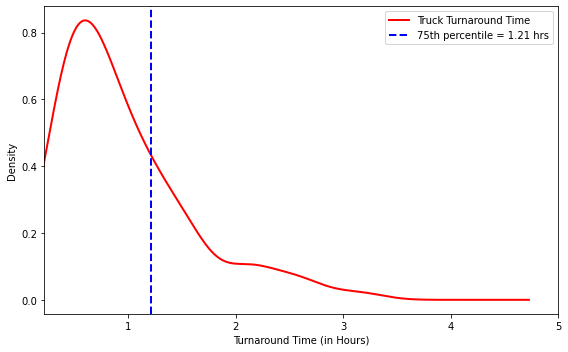

In [12]:
min_val = df_pickup_analysis["duration_hours"].min()
plt.figure(figsize=(8, 5))
p75_success = df_pickup_analysis['duration_hours'].quantile(0.75)
df_pickup_analysis['duration_hours'].plot(kind='kde', color='red', linewidth=2, label='Truck Turnaround Time')

plt.axvline(p75_success, color='blue', linestyle='--', linewidth=2, label=f'75th percentile = {p75_success:.2f} hrs')

plt.xlabel('Turnaround Time (in Hours)')
plt.ylabel('Density')
# plt.title('Truck Turnaround Duration in Hours')

plt.xlim(left=min_val, right=5) 
plt.legend()
plt.tight_layout()
plt.savefig('turnaround_distribution.png', dpi=300)
plt.show()

In [13]:
q3 = df_pickup_analysis['duration_hours'].quantile(0.75)
pickup_short = df_pickup_analysis[df_pickup_analysis['duration_hours'] <= q3]['pickup']
short_turn_rows = pickup_process[pickup_process['pickup'].isin(pickup_short)]
short_turn_rows.to_csv('Short_TurnAround.csv', index=False)

In [14]:
pickup_long = df_pickup_analysis[df_pickup_analysis['duration_hours'] > q3]['pickup']
long_turn_rows = pickup_process[pickup_process['pickup'].isin(pickup_long)]
long_turn_rows.to_csv('Long_TurnAround.csv', index=False)

In [15]:
q2 = df_pickup_analysis['duration_hours'].quantile(0.5)
extreme_pickup_short = df_pickup_analysis[df_pickup_analysis['duration_hours'] <= q2]['pickup']
extreme_short_turn_rows = pickup_process[pickup_process['pickup'].isin(extreme_pickup_short)]
extreme_short_turn_rows.to_csv('Extreme_Short_TurnAround.csv', index=False)

In [16]:
df_pickup_analysis["hour_of_day"] = pd.to_numeric(df_pickup_analysis["hour_of_day"], errors='coerce')
df_pickup_analysis["duration_hours"] = pd.to_numeric(df_pickup_analysis["duration_hours"], errors='coerce')

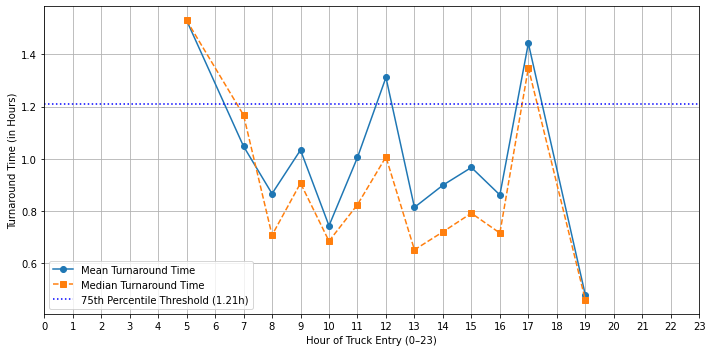

In [17]:
mean_turnaround = df_pickup_analysis.groupby("hour_of_day")["duration_hours"].mean()
median_turnaround = df_pickup_analysis.groupby("hour_of_day")["duration_hours"].median()

plt.figure(figsize=(10, 5))
plt.plot(mean_turnaround.index.to_numpy(), mean_turnaround.values, marker='o', label='Mean Turnaround Time')
plt.plot(median_turnaround.index.to_numpy(), median_turnaround.values, marker='s', linestyle='--', label='Median Turnaround Time')

plt.axhline(1.21, color='blue', linestyle=':', label='75th Percentile Threshold (1.21h)')
plt.xlabel("Hour of Truck Entry (0–23)")
plt.ylabel("Turnaround Time (in Hours)")
# plt.title("Comparison of Average and Median Truck Turnaround Time by Entry Hour")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("turnaround_arrival_pattern.png",dpi = 300)
plt.show()

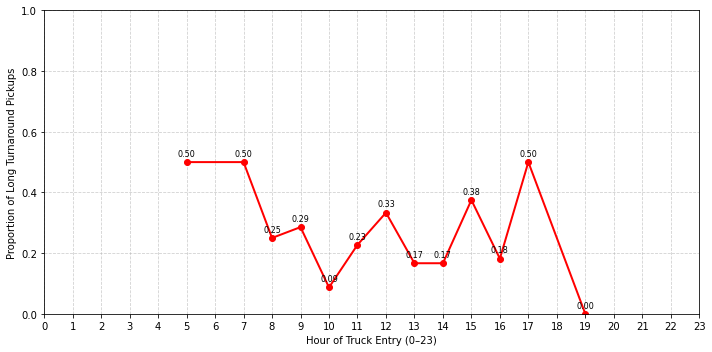

In [18]:
total_per_hour = df_pickup_analysis.groupby("hour_of_day").size()
long_df = df_pickup_analysis[df_pickup_analysis["duration_hours"] > q3]
long_per_hour = long_df.groupby("hour_of_day").size()

long_ratio = (long_per_hour / total_per_hour).fillna(0)
plt.figure(figsize=(10, 5))
plt.plot(long_ratio.index.to_numpy(), long_ratio.values, marker='o', color='red', linewidth=2, label='Long Turnaround Ratio')

for x, y in zip(long_ratio.index, long_ratio.values):
    plt.text(x, y + 0.02, f'{y:.2f}', ha='center', fontsize=8)

plt.xlabel('Hour of Truck Entry (0–23)')
plt.ylabel('Proportion of Long Turnaround Pickups')
# plt.title('Proportion of Pickups with Long Turnaround Time (≥ 1.21h) by Entry Hour')
plt.xticks(range(0, 24))
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend()
plt.tight_layout()
plt.savefig('longturnaround_arrival.png', dpi = 300)
plt.show()

In [19]:
last_activity_time = pickup_process.groupby("pickup")["Timestamp"].max().reset_index()
last_activity_time.columns = ["pickup", "t_exit"]
entry_time = pickup_process[pickup_process["Activity"] == "Enter the Port"]
entry_time = entry_time[["pickup", "Timestamp"]].rename(columns={"Timestamp": "t_entry"})
pickup_window = pd.merge(entry_time, last_activity_time, on="pickup", how="inner")
pickup_window

,pickup,t_entry,t_exit
0,1.0,2024-05-01 10:49:20,2024-05-01 12:09:42
1,2.0,2024-05-01 14:13:49,2024-05-01 15:04:20
2,3.0,2024-05-01 15:30:28,2024-05-01 16:32:57
3,4.0,2024-05-01 17:16:26,2024-05-01 18:50:49
4,5.0,2024-05-01 08:40:27,2024-05-01 09:31:23
...,...,...,...
195,196.0,2024-05-01 19:35:54,2024-05-01 19:57:12
196,197.0,2024-05-02 12:07:16,2024-05-02 14:10:48
197,198.0,2024-05-01 14:27:38,2024-05-01 14:57:36
198,199.0,2024-05-01 15:49:52,2024-05-01 16:03:21


In [20]:
min_time = pickup_window["t_entry"].min().floor('H')
max_time = pickup_window["t_exit"].max().ceil('H')
time_range = pd.date_range(start=min_time, end=max_time, freq='1H')


records = []
for time_point in time_range:
    count = ((pickup_window["t_entry"] < time_point) & (pickup_window["t_exit"] > time_point)).sum()
    records.append({
        "time": time_point,
        "active_trucks": count
    })

df_active_precise = pd.DataFrame(records)
df_active_precise["hour"] = df_active_precise["time"].dt.hour
df_active_precise["date"] = df_active_precise["time"].dt.date


# pivot_table = df_active_precise.pivot(index="hour", columns="date", values="active_trucks")


# plt.figure(figsize=(12, 6))
# plt.title("Throughput of Port (Aggregated by Hour)", fontsize=14)
# sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Number of trucks in Port'})
# plt.xlabel('Date')
# plt.ylabel('Hour')
# plt.tight_layout()
# plt.show()

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/279460183.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  min_time = pickup_window["t_entry"].min().floor('H')
C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/279460183.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  max_time = pickup_window["t_exit"].max().ceil('H')
C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/279460183.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start=min_time, end=max_time, freq='1H')


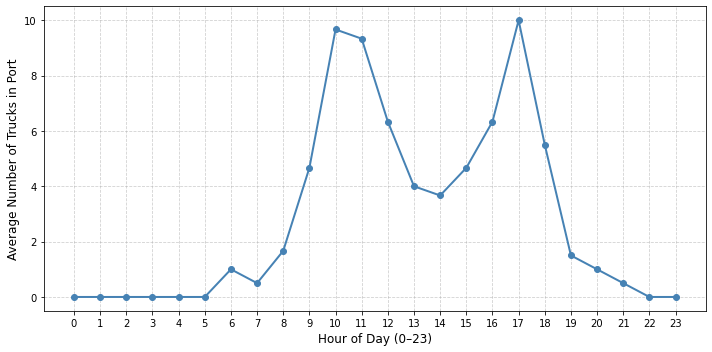

In [21]:
avg_by_hour = df_active_precise.groupby("hour")["active_trucks"].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(avg_by_hour["hour"].values, avg_by_hour["active_trucks"].values, marker="o", linewidth=2, color="steelblue")

# plt.title("Average Number of Trucks in Port by Hour", fontsize=14, weight='bold')
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Average Number of Trucks in Port", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('port_throughput.png',dpi = 300)
plt.show()


In [22]:
pickup_df = pickup_window.copy()
pickup_df["turnaround_hours"] = (pickup_df["t_exit"] - pickup_df["t_entry"]).dt.total_seconds() / 3600.0
congestion_levels = []
for i, row in pickup_df.iterrows():
    t_entry = row["t_entry"]
    count = ((pickup_df["t_entry"] < t_entry) & (pickup_df["t_exit"] > t_entry)).sum()
    congestion_levels.append(count)

pickup_df["entry_congestion"] = congestion_levels
pickup_df

,pickup,t_entry,t_exit,turnaround_hours,entry_congestion
0,1.0,2024-05-01 10:49:20,2024-05-01 12:09:42,1.339444,25
1,2.0,2024-05-01 14:13:49,2024-05-01 15:04:20,0.841944,10
2,3.0,2024-05-01 15:30:28,2024-05-01 16:32:57,1.041389,14
3,4.0,2024-05-01 17:16:26,2024-05-01 18:50:49,1.573056,20
4,5.0,2024-05-01 08:40:27,2024-05-01 09:31:23,0.848889,6
...,...,...,...,...,...
195,196.0,2024-05-01 19:35:54,2024-05-01 19:57:12,0.355000,2
196,197.0,2024-05-02 12:07:16,2024-05-02 14:10:48,2.058889,2
197,198.0,2024-05-01 14:27:38,2024-05-01 14:57:36,0.499444,12
198,199.0,2024-05-01 15:49:52,2024-05-01 16:03:21,0.224722,20


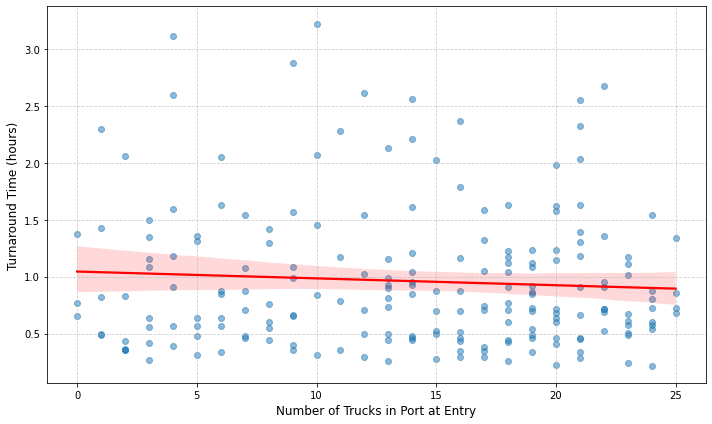

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=pickup_df,
    x="entry_congestion",
    y="turnaround_hours",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)

# plt.title("Relationship Between Turnaround Time and In-Port Truck Count at Entry", fontsize=14)
plt.xlabel("Number of Trucks in Port at Entry", fontsize=12)
plt.ylabel("Turnaround Time (hours)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('turnaround_throughput.png', dpi = 300)
plt.show()

In [24]:
pickup_df['entry_congestion'].describe()

count    200.000000
mean      13.855000
std        7.074192
min        0.000000
25%        8.000000
50%       15.000000
75%       20.000000
max       25.000000
Name: entry_congestion, dtype: float64

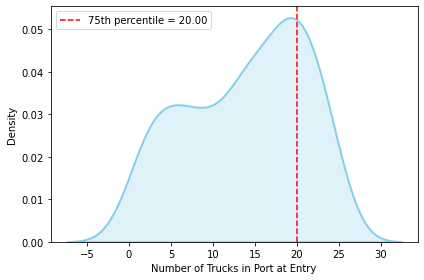

In [25]:
plt.figure(figsize=(6, 4))
sns.kdeplot(pickup_df['entry_congestion'], fill=True, color='skyblue', linewidth=2)

q3_congestion = pickup_df['entry_congestion'].quantile(0.75)
plt.axvline(q3_congestion, color='red', linestyle='--', label=f'75th percentile = {q3_congestion:.2f}')
plt.legend()

plt.xlabel("Number of Trucks in Port at Entry")
plt.ylabel("Density")
# plt.title("Distribution of Port Congestion Level at Entry", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.savefig('num_of_trucks_at_entry.png', dpi = 300)
plt.show()

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/996642565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pickup_df, x="congestion_level", y="turnaround_hours", palette="Set2")


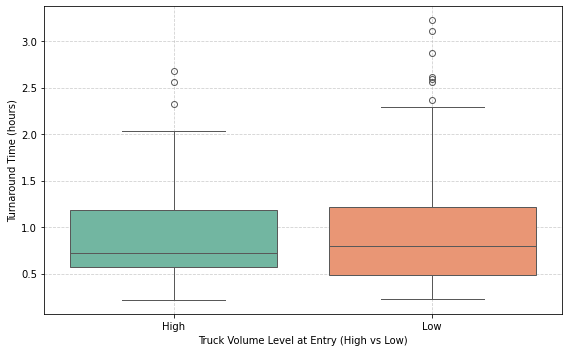

In [26]:
pickup_df["congestion_level"] = pickup_df["entry_congestion"].apply(
    lambda x: "High" if x > 20 else "Low"
)
plt.figure(figsize=(8, 5))
sns.boxplot(data=pickup_df, x="congestion_level", y="turnaround_hours", palette="Set2")

# plt.title("Turnaround Time Comparison: High vs Low Congestion", fontsize=14)
plt.xlabel("Truck Volume Level at Entry (High vs Low)")
plt.ylabel("Turnaround Time (hours)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Port_congestion_turnaround.png')
plt.show()


In [27]:
# pickup_df["entry_hour"] = pickup_df["t_entry"].dt.hour

# summary = pickup_df.groupby("entry_hour").agg(
#     trucks_arrived=("pickup", "count"),
#     avg_entry_congestion=("entry_congestion", "mean")
# ).reset_index()

# fig, ax1 = plt.subplots(figsize=(10, 5))

# color = 'tab:blue'
# ax1.set_xlabel("Hour of Day (Truck Entry Time)")
# ax1.set_ylabel("Number of Trucks Entering", color=color)
# ax1.plot(summary["entry_hour"], summary["trucks_arrived"], marker='o', color=color, label='Truck Arrivals')
# ax1.tick_params(axis='y', labelcolor=color)


# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel("Avg. Entry Congestion", color=color)
# ax2.plot(summary["entry_hour"], summary["avg_entry_congestion"], marker='s', linestyle='--', color=color, label='Avg. Congestion at Entry')
# ax2.tick_params(axis='y', labelcolor=color)

# plt.title("Truck Entry Time vs Observed Port Congestion")
# ax1.set_xticks(range(0, 24))
# fig.tight_layout()
# plt.grid(True, linestyle='--', alpha=0.4)
# plt.show()

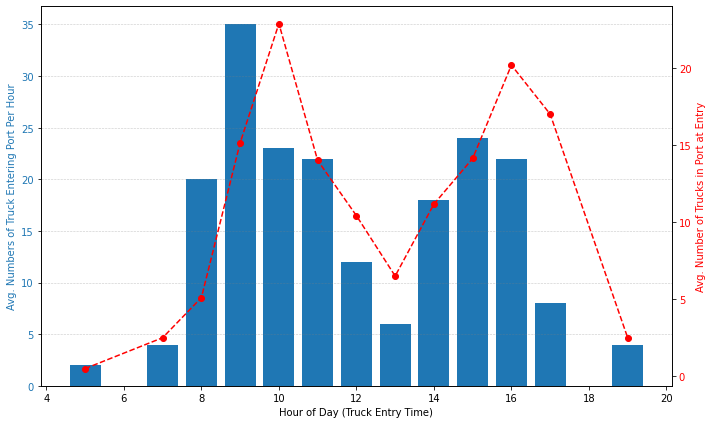

In [28]:
pickup_df["entry_hour"] = pickup_df["t_entry"].dt.hour
entry_counts = pickup_df.groupby('entry_hour').size()

avg_congestion = pickup_df.groupby('entry_hour')['entry_congestion'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(entry_counts.index, entry_counts.values, color='tab:blue', label='Trucks Entering')
ax1.set_xlabel('Hour of Day (Truck Entry Time)')
ax1.set_ylabel('Avg. Numbers of Truck Entering Port Per Hour', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.set_xticks(list(range(4, 21)))
# ax1.set_title('Hourly Truck Entry Volume and In-Port Truck Count at Entry', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(avg_congestion.index.to_numpy(), avg_congestion.values, color='red', marker='o', linestyle='--', label='Avg. Entry Congestion')
ax2.set_ylabel('Avg. Number of Trucks in Port at Entry', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

ax1.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.4, color='gray') 
fig.tight_layout()
plt.savefig('port_throughput_truck_entry.png', dpi = 300)
plt.show()

In [29]:
# pickup_df["duration_flag"] = pickup_df["turnaround_hours"].apply(lambda x: "Delay (>1.21h)" if x > 1.21 else "Normal (≤1.21h)")

# pickup_df["entry_hour"] = pd.to_datetime(pickup_df["t_entry"]).dt.hour

# plt.figure(figsize=(7, 4))
# # sns.set_style("whitegrid")

# sns.stripplot(
#     data=pickup_df,
#     x="entry_hour",
#     y="entry_congestion",
#     hue="duration_flag",  
#     palette={"Delay (>1.21h)": "red", "Normal (≤1.21h)": "green"},
#     # jitter=0.3,
#     alpha=0.8
# )


# plt.title("Port Congestion at Entry Hour with Turnaround Duration Coloring")
# plt.xlabel("Truck Entry Hour")
# plt.ylabel("Observed Port Congestion at Entry")
# plt.legend(title="Turnaround Duration")
# plt.tight_layout()
# plt.show()

In [30]:
# sns.set(style="whitegrid")

# plt.figure(figsize=(8, 5))


# sns.boxplot(x='entry_hour', y='entry_congestion', data=pickup_df, palette='Blues')
# plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.4, color='gray') 

# plt.title('Distribution of Port Congestion Levels Observed at Entry by Hour of Truck Arrival', fontsize=14)
# plt.xlabel('Hour of Day (Truck Entry Time)', fontsize=12)
# plt.ylabel('Number of Trucks in Port at Time of Entry', fontsize=12)

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

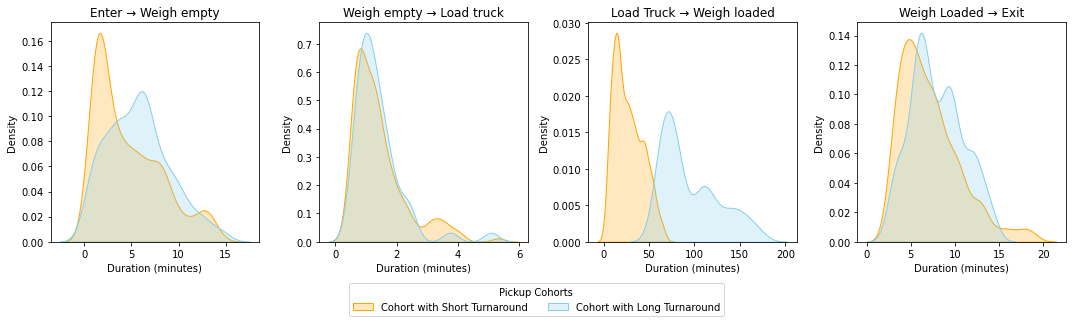

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=False)

duration_cols = {
    'Assign_weighempty': 'Enter → Weigh empty',
    'EmptyWeighing_Stack': 'Weigh empty → Load truck',
    'Stack_Loaded': 'Load Truck → Weigh loaded',
    'LoadedWeighing_Exit': 'Weigh Loaded → Exit'
}

legend_handles = []
legend_labels = []

for i, (col, title) in enumerate(duration_cols.items()):
    long_vals = pd.to_numeric(long_turn_rows[col], errors='coerce').dropna()
    short_vals = pd.to_numeric(short_turn_rows[col], errors='coerce').dropna()

    # Only assign labels in the first plot
    if i == 0:
        plot_q4 = sns.kdeplot(short_vals, ax=axes[i], label='Cohort with Short Turnaround',
                              fill=True, common_norm=False, color='orange')
        plot_q1 = sns.kdeplot(long_vals, ax=axes[i], label='Cohort with Long Turnaround',
                              fill=True, common_norm=False, color='skyblue')
        legend_handles, legend_labels = axes[i].get_legend_handles_labels()
    else:
        sns.kdeplot(short_vals, ax=axes[i], fill=True, common_norm=False, color='orange')
        sns.kdeplot(long_vals, ax=axes[i], fill=True, common_norm=False, color='skyblue')

    axes[i].set_title(title)
    axes[i].set_xlabel("Duration (minutes)")
    axes[i].set_ylabel("Density")

# Unified legend (above the plots)
fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2, title="Pickup Cohorts")

# Adjust layout to leave space for legend
# plt.suptitle("Duration Distribution per path: Cohort with Short Turnaround vs Cohort with Long Turnaround", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig("noraml_high_path_duration_comparison.png",dpi=300,bbox_inches='tight')
plt.show()

In [56]:
cols = ['Assign_weighempty','EmptyWeighing_Stack','Stack_Loaded', 'LoadedWeighing_Exit']
def first_valid(s):
    s = pd.to_numeric(s, errors='coerce').dropna()
    return s.iloc[0] if len(s) else np.nan
per_pickup = pickup_process.groupby('pickup').agg({c: first_valid for c in cols})
per_pickup

,Assign_weighempty,EmptyWeighing_Stack,Stack_Loaded,LoadedWeighing_Exit
pickup,,,,
1.0,6.750000,0.650000,64.733333,8.233333
2.0,1.616667,1.033333,34.766667,13.100000
3.0,3.933333,0.750000,54.883333,2.916667
4.0,12.383333,0.600000,72.550000,8.850000
5.0,1.783333,1.466667,43.800000,3.883333
...,...,...,...,...
196.0,2.933333,1.100000,13.800000,3.466667
197.0,2.783333,1.300000,109.966667,9.483333
198.0,1.683333,0.866667,24.800000,2.616667


In [57]:
per_pickup['Turnaround_Category'] = None
per_pickup.loc[per_pickup.index.isin(pickup_short), 'Turnaround_Category'] = 'Normal'
per_pickup.loc[per_pickup.index.isin(pickup_long),  'Turnaround_Category'] = 'High'
per_pickup


,Assign_weighempty,EmptyWeighing_Stack,Stack_Loaded,LoadedWeighing_Exit,Turnaround_Category
pickup,,,,,
1.0,6.750000,0.650000,64.733333,8.233333,High
2.0,1.616667,1.033333,34.766667,13.100000,Normal
3.0,3.933333,0.750000,54.883333,2.916667,Normal
4.0,12.383333,0.600000,72.550000,8.850000,High
5.0,1.783333,1.466667,43.800000,3.883333,Normal
...,...,...,...,...,...
196.0,2.933333,1.100000,13.800000,3.466667,Normal
197.0,2.783333,1.300000,109.966667,9.483333,High
198.0,1.683333,0.866667,24.800000,2.616667,Normal


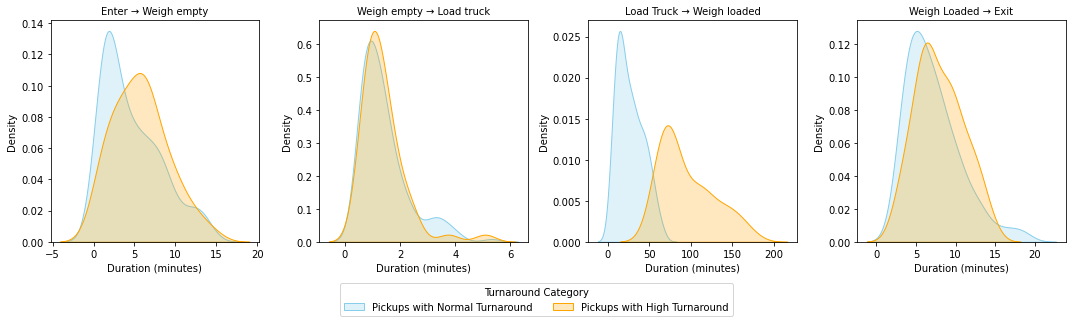

In [58]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=False)

duration_cols = {
    'Assign_weighempty': 'Enter → Weigh empty',
    'EmptyWeighing_Stack': 'Weigh empty → Load truck',
    'Stack_Loaded': 'Load Truck → Weigh loaded',
    'LoadedWeighing_Exit': 'Weigh Loaded → Exit'
}

legend_handles = []
legend_labels = []


for i, (col, title) in enumerate(duration_cols.items()):
    normal_data = pd.to_numeric(
        per_pickup.loc[per_pickup['Turnaround_Category'] == 'Normal', col],
        errors='coerce'
    ).dropna()
    long_data = pd.to_numeric(
        per_pickup.loc[per_pickup['Turnaround_Category'] == 'High', col],
        errors='coerce'
    ).dropna()

    def plot_or_line(data, ax, color, label):
        if data.empty:
            return
        if data.nunique() <= 1:
            ax.axvline(data.iloc[0], color=color, linestyle='-', linewidth=2, label=label)
        else:
            sns.kdeplot(data, ax=ax, label=label, fill=True, common_norm=False, color=color)

    plot_or_line(normal_data, axes[i], 'skyblue', 'Pickups with Normal Turnaround')
    plot_or_line(long_data, axes[i], 'orange', 'Pickups with High Turnaround')

    axes[i].set_title(title, fontsize=10)
    axes[i].set_xlabel("Duration (minutes)")
    axes[i].set_ylabel("Density")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2, title="Turnaround Category")

# plt.suptitle("Duration Distribution per Path by Turnaround Category", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig("normal_high_path_duration_comparison.png",dpi=300,bbox_inches='tight')
plt.show()

In [32]:
# load_truck_times = pickup_process[pickup_process['Activity'] == 'Load Truck'][['pickup', 'Timestamp']]
# load_truck_times = load_truck_times.rename(columns={'Timestamp': 'Load_Truck_time'})
# pickup_cargo_df = (pickup_process[['pickup', 'Cargo ID']].drop_duplicates(subset=['pickup']).merge(load_truck_times, on='pickup', how='inner'))
# pickup_cargo_df

In [33]:
# pickup_cargo_df['estimated_queue'] = 0

# for idx, row in pickup_cargo_df.iterrows():
#     cargo_id = row['Cargo ID']
#     load_time = row['Load_Truck_time']
#     pickup_id = row['pickup']

#     same_cargo_pickups = pickup_cargo_df[
#         (pickup_cargo_df['Cargo ID'] == cargo_id) &
#         (pickup_cargo_df['pickup'] != pickup_id)
#     ]

#     time_window_start = load_time - timedelta(minutes=30)
#     time_window_end = load_time + timedelta(minutes=30)

#     queue_count = same_cargo_pickups[
#         (same_cargo_pickups['Load_Truck_time'] >= time_window_start) &
#         (same_cargo_pickups['Load_Truck_time'] <= time_window_end)
#     ].shape[0]

#     # has_overlap = same_cargo_df.apply(
#     #     lambda x: start_time >= x['Load_Truck_time'] and start_time <= x['Load_Truck_end'], axis=1
#     # ).any()


#     pickup_cargo_df.at[idx, 'estimated_queue'] = queue_count

# pickup_cargo_df

In [34]:
# pickup_cargo_df['estimated_queue'].describe()

#### Object: Pickup Plan

In [35]:
pickupplan_durations = pickup_process.sort_values('Timestamp').groupby('Pickup Plan ID').agg(
    start_time=('Timestamp', 'min'),
    end_time=('Timestamp', 'max')
)
pickupplan_durations

,start_time,end_time
Pickup Plan ID,,
Pcp1,2024-05-01 16:03:16,2024-05-01 17:06:23
Pcp10,2024-05-01 10:36:31,2024-05-01 11:12:26
Pcp100,2024-05-01 11:34:37,2024-05-01 13:56:37
Pcp11,2024-05-01 17:14:46,2024-05-01 17:42:22
Pcp12,2024-05-01 16:40:14,2024-05-01 18:59:43
...,...,...
Pcp95,2024-05-01 15:21:09,2024-05-01 16:48:36
Pcp96,2024-05-01 17:16:26,2024-05-01 19:18:59
Pcp97,2024-05-01 15:15:38,2024-05-01 15:57:56


In [36]:
pickupplan_durations['duration_hours'] = (pickupplan_durations['end_time'] - pickupplan_durations['start_time']).dt.total_seconds() / 3600
pickupplan_durations['duration_hours'].describe()

count    100.000000
mean       1.310042
std        0.661582
min        0.343056
25%        0.787222
50%        1.173333
75%        1.600347
max        3.245000
Name: duration_hours, dtype: float64

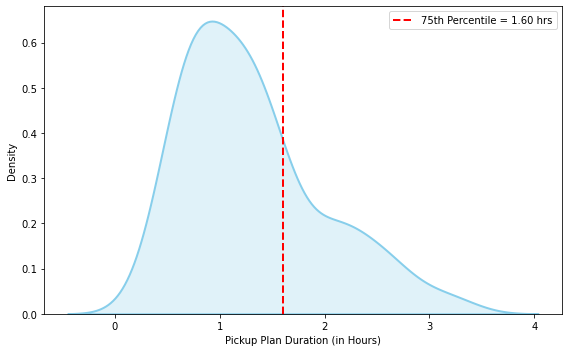

In [37]:
pp_q3 = pickupplan_durations['duration_hours'].quantile(0.75)

plt.figure(figsize=(8, 5))
sns.kdeplot(pickupplan_durations['duration_hours'], fill=True, color='skyblue', linewidth=2)

plt.axvline(pp_q3, color='red', linestyle='--', linewidth=2, label=f'75th Percentile = {pp_q3:.2f} hrs')

# plt.title("Distribution of Pickup Plan Duration")
plt.xlabel("Pickup Plan Duration (in Hours)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig('pickupplan_duration.png', dpi = 300)
plt.show()

In [38]:
pickupplan_durations

,start_time,end_time,duration_hours
Pickup Plan ID,,,
Pcp1,2024-05-01 16:03:16,2024-05-01 17:06:23,1.051944
Pcp10,2024-05-01 10:36:31,2024-05-01 11:12:26,0.598611
Pcp100,2024-05-01 11:34:37,2024-05-01 13:56:37,2.366667
Pcp11,2024-05-01 17:14:46,2024-05-01 17:42:22,0.460000
Pcp12,2024-05-01 16:40:14,2024-05-01 18:59:43,2.324722
...,...,...,...
Pcp95,2024-05-01 15:21:09,2024-05-01 16:48:36,1.457500
Pcp96,2024-05-01 17:16:26,2024-05-01 19:18:59,2.042500
Pcp97,2024-05-01 15:15:38,2024-05-01 15:57:56,0.705000


In [39]:
pp_q3 = pickupplan_durations['duration_hours'].quantile(0.75)
pickupplan_quick = pickupplan_durations[pickupplan_durations['duration_hours'] <= pp_q3].index
pickupplan_quick_rows = pickup_process[pickup_process['Pickup Plan ID'].isin(pickupplan_quick)]
pickupplan_quick_rows.to_csv('Quick_pickupplan.csv', index=False)

In [40]:
quick_single_truck_plans = pickupplan_quick_rows.groupby('Pickup Plan ID')['Truck ID'].nunique()
quick_single_truck_plans = quick_single_truck_plans[quick_single_truck_plans == 1]
quick_single_truck_plans

Series([], Name: Truck ID, dtype: int64)

In [41]:
pp_q3 = pickupplan_durations['duration_hours'].quantile(0.75)
pickupplan_slow = pickupplan_durations[pickupplan_durations['duration_hours'] > pp_q3].index
pickupplan_slow_rows = pickup_process[pickup_process['Pickup Plan ID'].isin(pickupplan_slow)]
pickupplan_slow_rows.to_csv('Slow_pickupplan.csv', index=False)

In [42]:
slow_single_truck_plans = pickupplan_slow_rows.groupby('Pickup Plan ID')['Truck ID'].nunique()
slow_single_truck_plans = slow_single_truck_plans[slow_single_truck_plans == 1]
slow_single_truck_plans

Series([], Name: Truck ID, dtype: int64)

#### Object: Truck

In [43]:
import sqlite3
db_path = "Dirigo.sqlite"
conn = sqlite3.connect(db_path)
df_o2o = pd.read_sql_query("SELECT * FROM OCEL_O2O", conn)
conn.close()

In [44]:
df_o2o['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_truck_assign = df_o2o[
    (df_o2o['O2O_qualifier'] == 'Assigned truck for pickup plan') &
    (df_o2o['Source_object_id'].astype(str).str.startswith('tr'))
]
assigned_counts = df_truck_assign.groupby('Source_object_id').size().sort_values(ascending=False)
assigned_counts


Source_object_id
tr29    7
tr41    7
tr22    6
tr5     6
tr31    6
tr3     6
tr23    6
tr25    5
tr46    5
tr35    5
tr49    5
tr30    5
tr42    5
tr8     5
tr13    5
tr50    4
tr43    4
tr38    4
tr44    4
tr11    4
tr12    4
tr14    4
tr15    4
tr21    4
tr18    4
tr28    4
tr27    4
tr26    4
tr19    4
tr24    4
tr1     4
tr7     3
tr48    3
tr6     3
tr32    3
tr4     3
tr39    3
tr34    3
tr33    3
tr10    3
tr20    3
tr2     3
tr17    3
tr16    3
tr9     3
tr40    2
tr37    2
tr45    2
tr36    2
tr47    2
dtype: int64

In [45]:
df_truck_assign = df_truck_assign.sort_values(['Source_object_id', 'Timestamp'])
df_truck_assign['time_diff'] = df_truck_assign.groupby('Source_object_id')['Timestamp'].diff()
truck_interval_stats = df_truck_assign.groupby('Source_object_id')['time_diff'].describe()
truck_interval_stats

,count,mean,std,min,25%,50%,75%,max
Source_object_id,,,,,,,,
tr1,3,0 days 08:14:04.666666666,0 days 08:06:41.271621854,0 days 00:24:04,0 days 04:03:10.500000,0 days 07:42:17,0 days 12:09:05,0 days 16:35:53
tr10,2,0 days 01:00:25.500000,0 days 00:26:34.525791575,0 days 00:41:38,0 days 00:51:01.750000,0 days 01:00:25.500000,0 days 01:09:49.250000,0 days 01:19:13
tr11,3,0 days 05:55:57,0 days 08:22:10.054115450,0 days 01:04:22,0 days 01:06:01.500000,0 days 01:07:41,0 days 08:21:44.500000,0 days 15:35:48
tr12,3,0 days 02:12:54.666666666,0 days 02:10:14.493606967,0 days 00:24:20,0 days 01:00:42.500000,0 days 01:37:05,0 days 03:07:12,0 days 04:37:19
tr13,4,0 days 06:53:00.500000,0 days 07:05:17.231988076,0 days 01:52:04,0 days 02:20:04.750000,0 days 04:15:18.500000,0 days 08:48:14.250000,0 days 17:09:21
tr14,3,0 days 00:18:16.666666666,0 days 00:16:01.541644097,0 days 00:06:58,0 days 00:09:06.500000,0 days 00:11:15,0 days 00:23:56,0 days 00:36:37
tr15,3,0 days 07:25:42.333333333,0 days 08:19:05.166176418,0 days 00:23:27,0 days 02:50:19,0 days 05:17:11,0 days 10:56:50,0 days 16:36:29
tr16,2,0 days 07:49:31,0 days 07:03:13.618725971,0 days 02:50:15,0 days 05:19:53,0 days 07:49:31,0 days 10:19:09,0 days 12:48:47
tr17,2,0 days 01:59:20,0 days 01:19:37.213413696,0 days 01:03:02,0 days 01:31:11,0 days 01:59:20,0 days 02:27:29,0 days 02:55:38


In [46]:
plot_df = df_truck_assign.dropna(subset=['time_diff']).copy()
plot_df['time_diff_hours'] = plot_df['time_diff'].dt.total_seconds() / 3600

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/3809491166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/3809491166.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


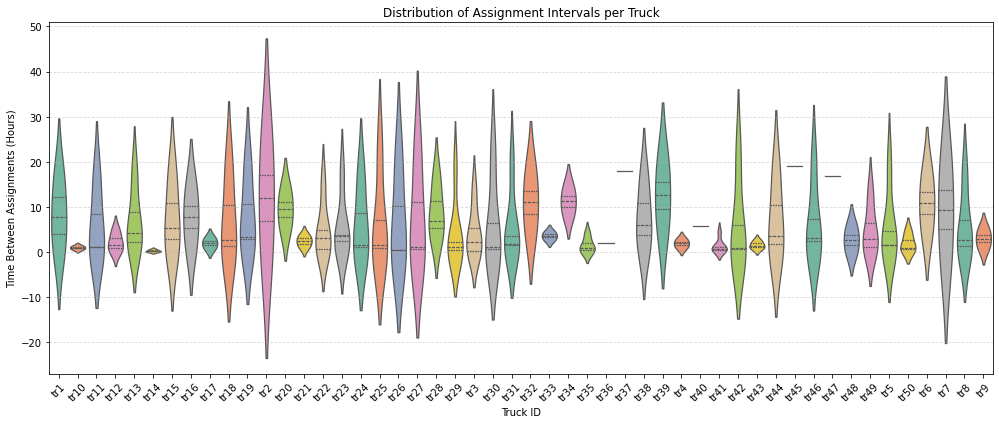

In [47]:
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=plot_df,
    x='Source_object_id',
    y='time_diff_hours',
    inner='quartile',
    scale='width',
    palette='Set2'
)

plt.ylabel('Time Between Assignments (Hours)')
plt.xlabel('Truck ID')
plt.title('Distribution of Assignment Intervals per Truck')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\n9810200\AppData\Local\Temp/ipykernel_33960/1701819776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


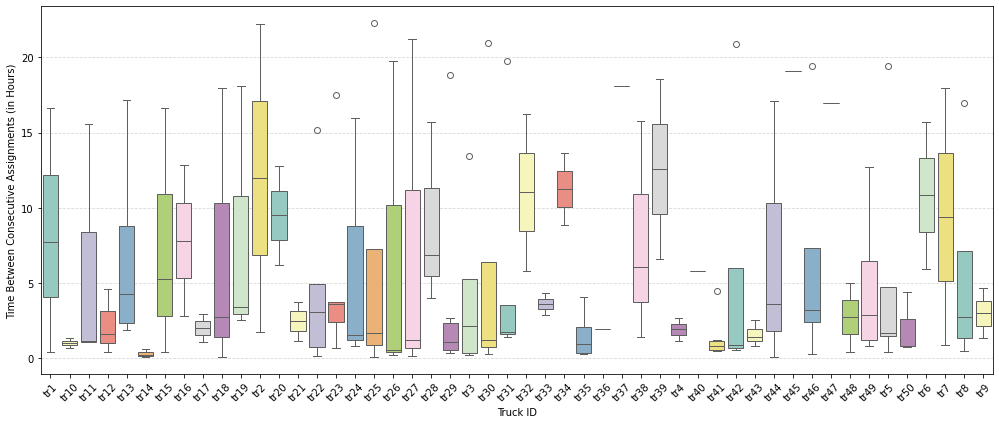

In [48]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=plot_df,
    x='Source_object_id',
    y='time_diff_hours',
    palette='Set3'
)
# plt.title('Assignment Interval per Truck')
plt.ylabel('Time Between Consecutive Assignments (in Hours)')
plt.xlabel('Truck ID')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('truck_utilisation.png', dpi = 300)
plt.show()

In [49]:
# df_filtered = df_o2o[
#     df_o2o['O2O_qualifier'].isin(['Assigned truck for pickup plan', 'Dropped truck from pickup plan']) &
#     df_o2o['Source_object_id'].astype(str).str.startswith('tr')
# ].copy()

# df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])

In [50]:
# def pair_assign_drop(group):
#     assigns = group[group['O2O_qualifier'] == 'Assigned truck for pickup plan'].sort_values('Timestamp')
#     drops   = group[group['O2O_qualifier'] == 'Dropped truck from pickup plan'].sort_values('Timestamp')

#     n = min(len(assigns), len(drops))
#     if n == 0:
#         return pd.DataFrame()

#     result = pd.DataFrame({
#         'Truck ID': assigns['Source_object_id'].values[:n],
#         'Pickup Plan ID': assigns['Target_object_id'].values[:n],
#         'assign_time': assigns['Timestamp'].values[:n],
#         'drop_time': drops['Timestamp'].values[:n]
#     })

#     result['duration_hours'] = (result['drop_time'] - result['assign_time']).dt.total_seconds() / 3600
#     result = result[result['duration_hours'] >= 0]  # filter out invalid cases
#     return result

# paired_df = (
#     df_filtered
#     .sort_values('Timestamp')
#     .groupby(['Source_object_id', 'Target_object_id'], group_keys=False)
#     .apply(pair_assign_drop)
#     .reset_index(drop=True)
# )

In [51]:
# summary_stats = paired_df.groupby('Truck ID')['duration_hours'].agg(['count', 'mean']).rename(
#     columns={'count': 'num_tasks', 'mean': 'avg_task_duration'}
# )


# assign_counts = df_filtered[df_filtered['O2O_qualifier'] == 'Assigned truck for pickup plan']
# assign_counts = assign_counts['Source_object_id'].value_counts().rename('assign_count')


# truck_usage_summary = summary_stats.merge(assign_counts, left_index=True, right_index=True)

In [52]:
# truck_usage_summary = truck_usage_summary.sort_values('avg_task_duration', ascending=False)

# fig, ax1 = plt.subplots(figsize=(14, 6))

# color_bar = 'skyblue'
# ax1.bar(truck_usage_summary.index, truck_usage_summary['num_tasks'], color=color_bar, label='Number of Tasks')
# ax1.set_ylabel('Number of Assignment', color=color_bar)
# ax1.tick_params(axis='y', labelcolor=color_bar)

# ax1.grid(axis='y', linestyle='--', alpha=0.5)

# ax2 = ax1.twinx()
# color_line = 'darkred'
# ax2.plot(truck_usage_summary.index, truck_usage_summary['avg_task_duration'], color=color_line, marker='o', label='Avg Task Duration')
# ax2.set_ylabel('Average Pickup Duration (Hours)', color=color_line)
# ax2.tick_params(axis='y', labelcolor=color_line)

# plt.title('Truck Utilization: Assignment Frequency vs Avg Duration')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()